In [11]:
import random as rand
import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

# Normal distribution

\begin{equation*}
f(x \; | \; \mu, \sigma^2) = \frac{1}{\sqrt{2\sigma^2\pi} } \; e^{ -\frac{(x-\mu)^2}{2\sigma^2} }
\end{equation*}

In [12]:
def normal_density(x, mu=0, sigma=1):
    return 1 / math.sqrt(2 * sigma**2 * math.pi) * math.exp(- (x - mu)**2 / 2 * sigma*sigma)

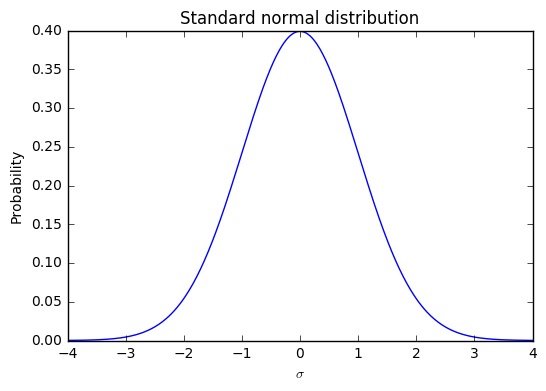

In [13]:
size = 500
normal_dens = np.zeros(size)
x_axis = np.linspace(-4, 4, num=size)
for i in range(size):
    normal_dens[i] = normal_density(x_axis[i])
plt.plot(x_axis, normal_dens)
plt.xlabel('$\sigma$')
plt.ylabel('Probability')
plt.title('Standard normal distribution')
plt.show()

## Central limit theorem

In [14]:
def normal_variates(size, mu=0, sigma=1):    
    normal_variates = np.zeros(size)
    for normal_i in range(size):
        uniform_variates = 0
        for uniform_i in range(12):
            uniform_variates += rand.random()
        normal_variates[normal_i] = mu + sigma * (uniform_variates - 6)
    return normal_variates

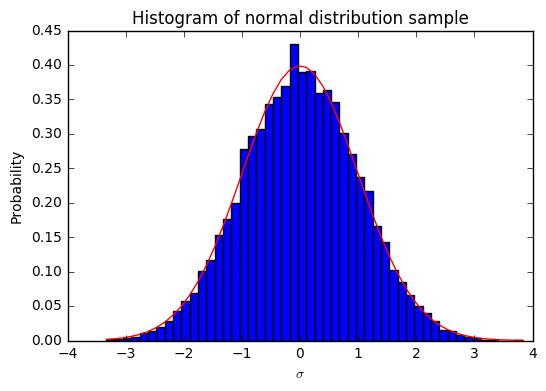

In [15]:
sample_size = 10000
mu, sigma = 0, 1
norm_sample = normal_variates(sample_size)

num_bins = 50
n, bins, patches = plt.hist(norm_sample, num_bins, normed=True)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, color='r')
plt.xlabel('$\sigma$')
plt.ylabel('Probability')
plt.title('Histogram of normal distribution sample')
plt.show()